In [1]:
pip install pandas openpyxl matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\pvtsa\OneDrive\Desktop\sana afreen\project\Unemployment in India.csv")
print(df)

             Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               NaN   

      Estimated Employed   

In [4]:
df.head()      # first 5 rows
df.tail()      # last 5 rows
df.info()      # column names & data types
df.describe()  # summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [5]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [6]:
df.dropna(inplace=True)

C:\Users\pvtsa\AppData\Local\Temp\ipykernel_26676\4246400169.py:8: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


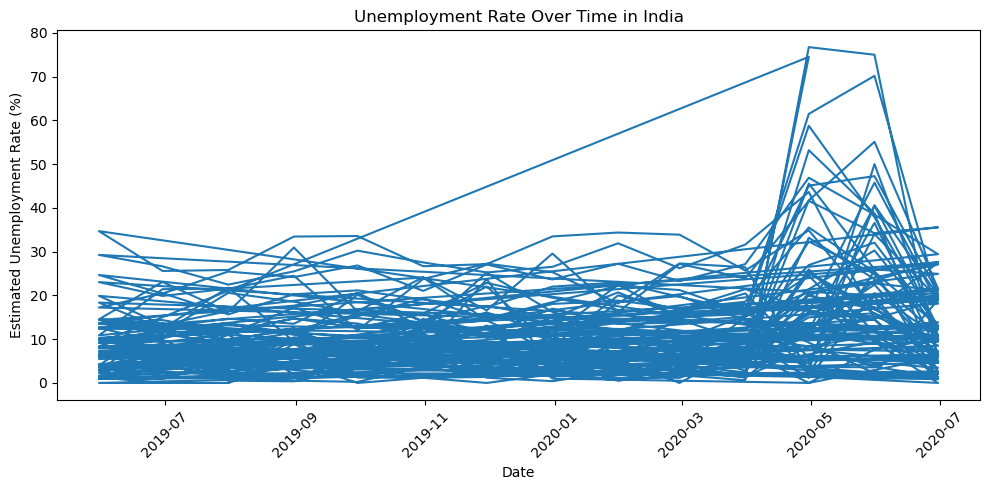

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\pvtsa\OneDrive\Desktop\sana afreen\project\Unemployment in India.csv")

df.columns = df.columns.str.strip()

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Estimated Unemployment Rate (%)'])
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.title("Unemployment Rate Over Time in India")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



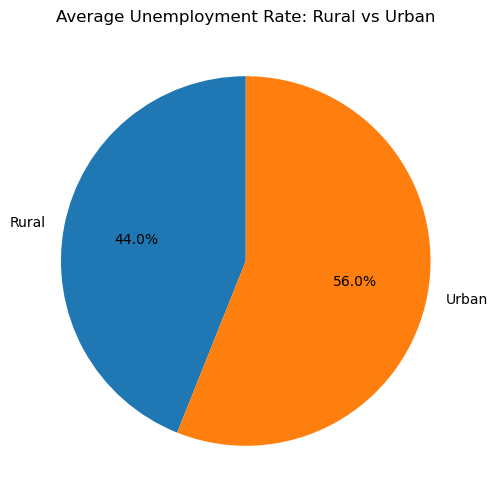

In [8]:
area_avg = df.groupby('Area')['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(6,6))
plt.pie(area_avg,
        labels=area_avg.index,
        autopct='%1.1f%%',
        startangle=90)

plt.title("Average Unemployment Rate: Rural vs Urban")
plt.show()


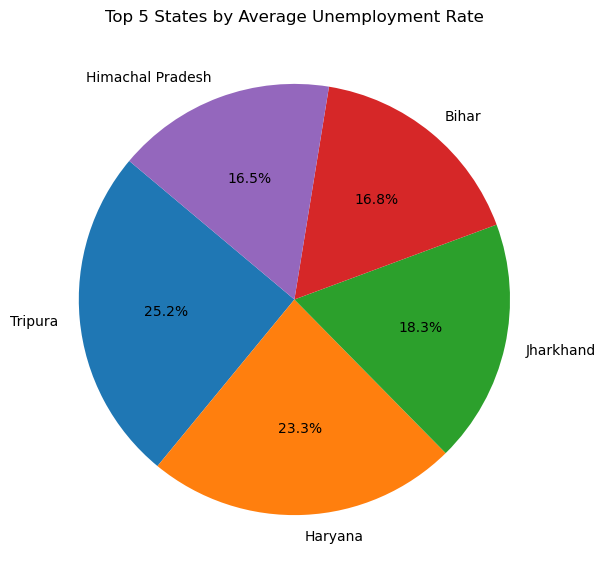

In [9]:
state_avg = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean()
top5_states = state_avg.sort_values(ascending=False).head(5)

plt.figure(figsize=(7,7))
plt.pie(top5_states,
        labels=top5_states.index,
        autopct='%1.1f%%',
        startangle=140)

plt.title("Top 5 States by Average Unemployment Rate")
plt.show()


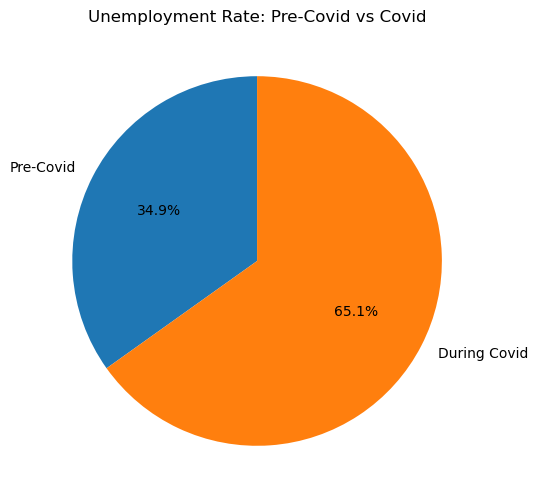

In [10]:
pre_covid = df[df['Date'] < '2020-03']['Estimated Unemployment Rate (%)'].mean()
covid = df[df['Date'] >= '2020-03']['Estimated Unemployment Rate (%)'].mean()

values = [pre_covid, covid]
labels = ['Pre-Covid', 'During Covid']

plt.figure(figsize=(6,6))
plt.pie(values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90)

plt.title("Unemployment Rate: Pre-Covid vs Covid")
plt.show()
